# Model 1 
- batchsize 32, 
- 300 epoch


In [1]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

path = '../input/'

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=32, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


Convert from RGB to Lab

In [2]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

(32, 256, 256, 1)
(32, 256, 256, 2)


In [3]:
#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

2022-10-08 15:06:46.207997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 15:06:46.298009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 15:06:46.298763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 15:06:46.300391: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 512)       2

In [5]:
model.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300


2022-10-08 15:06:49.034079: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-08 15:06:50.606652: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1/1 [==============================] - 11s 11s/step - loss: 0.0667 - accuracy: 0.5317 - val_loss: 1.0089 - val_accuracy: 0.3644
Epoch 2/300
1/1 [==============================] - 0s 181ms/step - loss: 0.9327 - accuracy: 0.4480 - val_loss: 0.8537 - val_accuracy: 0.6373
Epoch 3/300
1/1 [==============================] - 0s 174ms/step - loss: 0.9049 - accuracy: 0.5551 - val_loss: 0.1399 - val_accuracy: 0.3997
Epoch 4/300
1/1 [==============================] - 0s 173ms/step - loss: 0.1370 - accuracy: 0.4657 - val_loss: 0.0414 - val_accuracy: 0.3968
Epoch 5/300
1/1 [==============================] - 0s 173ms/step - loss: 0.0303 - accuracy: 0.4559 - val_loss: 0.0372 - val_accuracy: 0.6292
Epoch 6/300
1/1 [==============================] - 0s 171ms/step - loss: 0.0298 - accuracy: 0.5605 - val_loss: 0.0368 - val_accuracy: 0.6341
Epoch 7/300
1/1 [==============================] - 0s 173ms/step - loss: 0.0290 - accuracy: 0.5629 - val_loss: 0.0368 - val_accuracy: 0.6323
Epoch 8/300
1/1 [=========

# Model2

- Train batch 710
- less complex model

In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [7]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

(710, 256, 256, 1)
(710, 256, 256, 2)


In [8]:

#Encoder
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model1.add(UpSampling2D((2, 2)))

In [9]:
model1.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)       295040    
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 64, 64, 128)      

In [10]:
model1.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
18/18 [==============================] - 6s 221ms/step - loss: 0.9377 - accuracy: 0.4719 - val_loss: 0.9612 - val_accuracy: 0.4924
Epoch 2/300
18/18 [==============================] - 2s 116ms/step - loss: 0.9741 - accuracy: 0.5443 - val_loss: 0.9516 - val_accuracy: 0.5541
Epoch 3/300
18/18 [==============================] - 2s 115ms/step - loss: 0.5299 - accuracy: 0.5005 - val_loss: 0.0301 - val_accuracy: 0.5748
Epoch 4/300
18/18 [==============================] - 2s 116ms/step - loss: 0.0286 - accuracy: 0.5332 - val_loss: 0.0282 - val_accuracy: 0.5521
Epoch 5/300
18/18 [==============================] - 2s 115ms/step - loss: 0.0278 - accuracy: 0.5364 - val_loss: 0.0264 - val_accuracy: 0.5715
Epoch 6/300
18/18 [==============================] - 2s 115ms/step - loss: 0.0271 - accuracy: 0.5828 - val_loss: 0.0263 - val_accuracy: 0.6651
Epoch 7/300
18/18 [==============================] - 2s 118ms/step - loss: 0.0260 - accuracy: 0.6397 - val_loss: 0.0262 - val_accuracy: 0.6599

# Model3
- Less complex and dropout

In [11]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [12]:
X =[]
Y =[]
for img in train[0]:
  lab = rgb2lab(img)
  X.append(lab[:,:,0]) 
  Y.append(lab[:,:,1:] / 128) 
  
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

(710, 256, 256, 1)
(710, 256, 256, 2)


In [13]:
from keras.layers import Dropout

#Encoder
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))

In [14]:
model3.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 256)      

In [15]:
model3.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
18/18 [==============================] - 3s 138ms/step - loss: 0.2114 - accuracy: 0.5254 - val_loss: 0.0287 - val_accuracy: 0.5548
Epoch 2/300
18/18 [==============================] - 2s 126ms/step - loss: 0.0285 - accuracy: 0.5348 - val_loss: 0.0272 - val_accuracy: 0.5548
Epoch 3/300
18/18 [==============================] - 2s 127ms/step - loss: 0.0280 - accuracy: 0.5352 - val_loss: 0.0280 - val_accuracy: 0.5548
Epoch 4/300
18/18 [==============================] - 2s 126ms/step - loss: 0.0281 - accuracy: 0.5353 - val_loss: 0.0279 - val_accuracy: 0.5548
Epoch 5/300
18/18 [==============================] - 2s 126ms/step - loss: 0.0274 - accuracy: 0.5474 - val_loss: 0.0258 - val_accuracy: 0.6460
Epoch 6/300
18/18 [==============================] - 2s 126ms/step - loss: 0.0270 - accuracy: 0.6014 - val_loss: 0.0257 - val_accuracy: 0.6592
Epoch 7/300
18/18 [==============================] - 2s 126ms/step - loss: 0.0261 - accuracy: 0.6662 - val_loss: 0.0244 - val_accuracy: 0.6679

### Models
model
- accuracy: 0.7866 - val_accuracy: 0.7758

model1
- accuracy: 0.8432  - val_accuracy: 0.6941

model3

- accuracy: 0.8210 - val_loss: 0.0221 - val_accuracy: 0.6905



## Test result

Download test images

In [16]:
from PIL import Image
import requests
from io import BytesIO

url1 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/old-barn-in-black-and-white-randall-nyhof.jpg'

url2 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/horizontal-black-and-white-photograph-of-a-lake-michigan-sunset-randall-nyhof.jpg'

url3 = 'https://images.unsplash.com/photo-1614925861087-aa06270091b3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8OXx8YmxhY2slMjBhbmQlMjB3aGl0ZSUyMG5hdHVyZXxlbnwwfHwwfHw%3D&w=1000&q=80'

url4 = 'https://images.squarespace-cdn.com/content/538a3874e4b0ab1541d204ad/1490210210601-DDAMF95MFG8RQ7T1M56V/?content-type=image%2Fjpeg'

url_list = [url1,url2,url3,url4]

In [17]:
import matplotlib.pyplot as plt

Model 1 

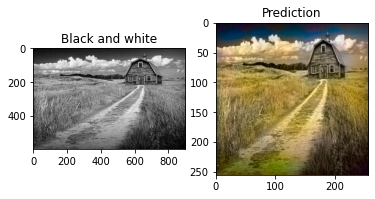

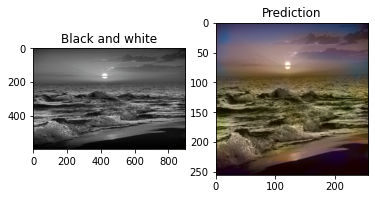

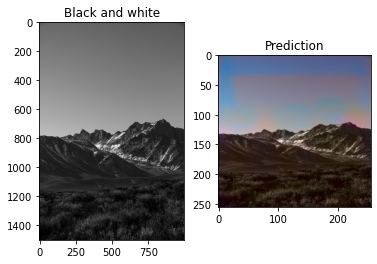

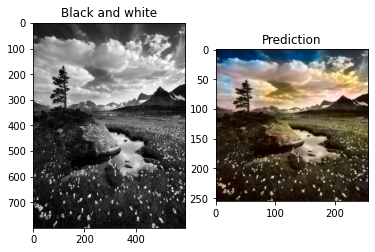

In [18]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

Model 2

/opt/conda/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 10 pixels
  return func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 29 pixels
  return func(*args, **kwargs)


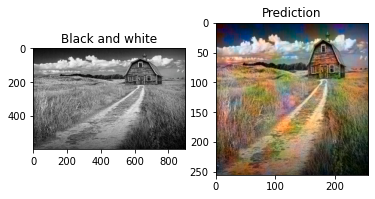

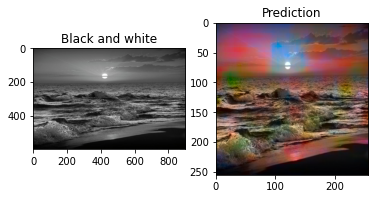

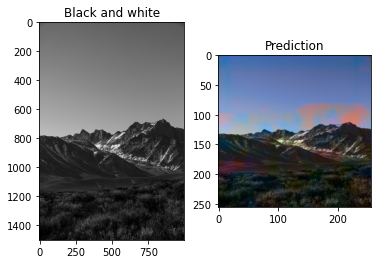

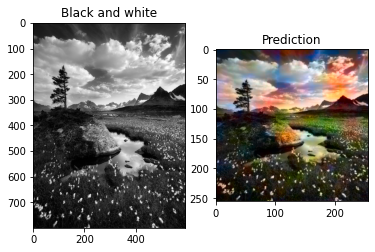

In [19]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model1.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

Model 3

/opt/conda/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return func(*args, **kwargs)


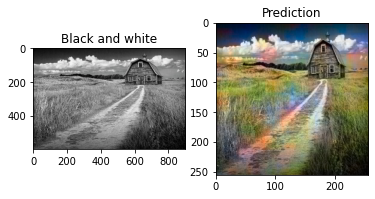

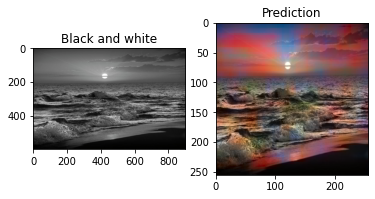

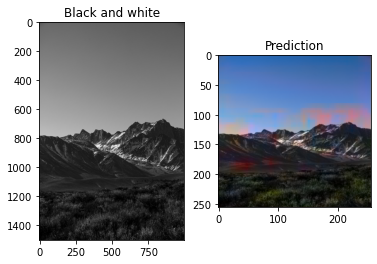

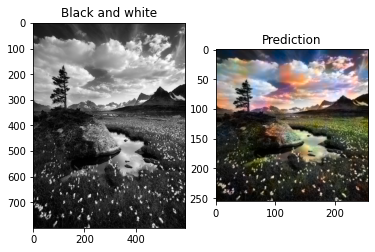

In [20]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model3.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

### Save model

In [21]:
model1.save('image-colorization.h5')

### Load model

In [22]:
#model = tf.keras.models.load_model('/content/image-colorization.h5')